## Introduction

The healthcare insurance landscape is complex, offering a multitude of plans with varying coverage, costs, and benefits. Individuals often struggle to navigate this complexity, leading to inferior choices that may not fully address their unique needs and financial circumstances. This project aims to develop an intelligent recommender system that simplifies the insurance plan selection process. By leveraging user profiles and plan characteristics, the system will provide personalized recommendations, ensuring individuals find plans that align with their specific requirements. This system seeks to bridge the gap between the abundance of available insurance options and the individual's ability to make informed decisions, ultimately improving user satisfaction and access to appropriate healthcare coverage.

## Problem Statement

Many individuals find it challenging to select an appropriate health insurance plan due to the overwhelming number of available options, intricate plan details, and a lack of personalized guidance. This often results in:

* Suboptimal Coverage: Individuals may choose plans that do not adequately cover their specific health needs or pre-existing conditions.

* Financial Burden: Users may select plans with excessive premiums or out-of-pocket costs, leading to unnecessary financial strain.

*Decision Fatigue: The complexity of the insurance market can lead to decision fatigue, causing individuals to make rushed or uninformed choices.

* Knowledge gap: Individuals often lack the expertise to compare and evaluate complex insurance plans effectively.

Therefore, there is a need for a user-friendly system that can intelligently recommend insurance plans based on individual profiles and preferences, thereby mitigating these challenges.

### Objectives

* To develop a content-based recommender system that suggests suitable insurance plans based on user demographics, socioeconomic factors, and health-related information.

* Address the real-world challenge of insurance plan selection by integrating domain-specific knowledge and regulatory compliance considerations into the model

### Data Limitations

This project utilizes a synthetic dataset, which presents certain limitations:

1. Synthetic Nature: The data is not derived from real-world user interactions or insurance transactions. This may limit the generalizability of the recommender system to actual user behavior.

2. Potential Biases: synthetic data may still contain inherent biases that do not reflect real-world populations.

3. Limited External Factors: The synthetic data might not capture all external factors that influence insurance plan choices, such as economic conditions or regulatory changes.

4. Data Accuracy: While the data has been made to be accurate, there is always the possibility of errors within synthetic data.

## Exploratory Data Analysis (EDA)

### Data Loading and Initial Inspection

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('../health_insurance_recommender.csv')

# display the first five rows
df.head()

,user_id,age,gender,country,region,employment_status,monthly_income,pre_existing_conditions,number_of_dependents,current_health_expenditure,...,education_level,recent_hospital_visits,smoking_habit,alcohol_consumption,existing_medications,disability_status,co_payment_preference,lifetime_coverage_limit,preferred_hospital,claim_reimbursement_speed
0,1,78.0,Female,Kenya,Urban,Self-Employed,342.147528,Cancer,2,2614.37,...,Bachelor's,5,No,Yes,No,Yes,High,50000,Life Healthcare,Medium
1,2,27.0,Male,Kenya,Semi-Urban,Unemployed,23.271139,None,1,3343.49,...,Master's,10,Yes,Yes,No,Yes,High,1000000,Netcare,Slow
2,3,74.0,Male,Kenya,Urban,Unemployed,7605.332784,None,5,4615.26,...,Diploma,1,No,Yes,Yes,Yes,High,1000000,Netcare,Fast
3,4,38.0,Male,Kenya,Rural,Employed,2349.243288,Cancer,3,612.38,...,Diploma,5,No,Yes,No,No,High,1000000,Netcare,Medium
4,5,43.0,Male,Kenya,Urban,Employed,17.187938,Asthma,4,2314.12,...,Bachelor's,0,No,Yes,No,Yes,High,1000000,Aga Khan Hospital,Fast


In [ ]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      52500 non-null  int64  
 1   age                          49859 non-null  float64
 2   gender                       52500 non-null  object 
 3   country                      52500 non-null  object 
 4   region                       52500 non-null  object 
 5   employment_status            52500 non-null  object 
 6   monthly_income               49864 non-null  float64
 7   pre_existing_conditions      52500 non-null  object 
 8   number_of_dependents         52500 non-null  int64  
 9   current_health_expenditure   52500 non-null  float64
 10  hospital_preference          52500 non-null  object 
 11  previous_insurance_coverage  52500 non-null  object 
 12  preferred_coverage_type      52500 non-null  object 
 13  insurance_provid

The dataset contains 52,500 rows and 42 columns. Some columns have missing values. For instance, age has 49,859 non-null values, meaning there are missing age values. The dataset contains a mix of numerical (integer and float) and categorical (object) data, 

In [ ]:
# display list of all column names
print(df.columns.tolist())

['user_id', 'age', 'gender', 'country', 'region', 'employment_status', 'monthly_income', 'pre_existing_conditions', 'number_of_dependents', 'current_health_expenditure', 'hospital_preference', 'previous_insurance_coverage', 'preferred_coverage_type', 'insurance_provider', 'plan_cost', 'deductible_amount', 'out_of_pocket_max', 'medication_coverage', 'maternity_coverage', 'chronic_illness_coverage', 'emergency_coverage', 'dental_coverage', 'vision_coverage', 'user_satisfaction_rating', 'recommended_plan', 'policy_expiry_date', 'duplicate_plan_cost', 'duplicate_country', 'waiting_period_months', 'family_size', 'marital_status', 'employment_type', 'education_level', 'recent_hospital_visits', 'smoking_habit', 'alcohol_consumption', 'existing_medications', 'disability_status', 'co_payment_preference', 'lifetime_coverage_limit', 'preferred_hospital', 'claim_reimbursement_speed']


### Check for missing values

In [ ]:
# display only columns with missing values and their count
missing_values = df.isna().sum().loc[lambda x : x > 0]
print(missing_values)

age                         2641
monthly_income              2636
user_satisfaction_rating    2619
dtype: int64


### Descriptive statistics

In [8]:
# summary statistics
df.describe()

,user_id,age,monthly_income,number_of_dependents,current_health_expenditure,plan_cost,deductible_amount,out_of_pocket_max,user_satisfaction_rating,duplicate_plan_cost,waiting_period_months,family_size,recent_hospital_visits,lifetime_coverage_limit
count,52500.000000,49859.000000,49864.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,49881.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000
mean,24980.571486,48.535911,2229.294781,2.492286,2542.757659,599.710239,113.864270,381.808335,3.001423,27581.730840,4.911219,3.501067,4.990590,315353.333333
std,14433.032416,17.922048,3993.264625,1.705581,1416.930992,1029.239746,200.843563,634.008554,1.419540,13051.249725,6.010216,1.709279,3.155993,347630.969987
min,1.000000,18.000000,1.281549,0.000000,100.030000,1.260237,0.126121,1.260728,1.000000,5000.160000,0.000000,1.000000,0.000000,0.000000
25%,12479.750000,33.000000,59.004709,1.000000,1316.652500,22.398519,3.185938,21.623265,2.000000,16220.612500,1.000000,2.000000,2.000000,50000.000000
50%,24974.500000,48.000000,611.079480,2.000000,2540.765000,168.510240,31.528224,107.380008,3.000000,27641.475000,3.000000,4.000000,5.000000,100000.000000
75%,37471.250000,64.000000,1360.548180,4.000000,3766.235000,354.352950,69.125184,215.736066,4.000000,38970.142500,6.000000,5.000000,8.000000,500000.000000
max,50000.000000,79.000000,19434.987400,5.000000,4999.990000,4859.763804,971.922240,2915.811432,5.000000,49999.710000,24.000000,6.000000,10.000000,1000000.000000


General Overview

The dataset contains 52,500 records, but some columns have missing values (e.g., age, monthly_income, and user_satisfaction_rating have fewer entries).
The numerical values have a wide range, suggesting the presence of high variability among users.

### Check for any duplicate

In [9]:
duplicates = df.duplicated().sum()
duplicates

0

In [12]:
# Check if the columns are identical
print((df['country'] == df['duplicate_country']).all())  # True if identical


True


In [ ]:
# Check if the columns are identical
print((df['plan_cost'] == df['duplicate_plan_cost']).all())  # True if identical

False


From the above outcome it shows that country and duplicate_country are identical while plan_cost and duplicate_plan_cost there are values in the two columns that do not match.

In [19]:
# Display the unique values in the target variable
print(df['recommended_plan'].unique())

# Display the value counts (frequency) of each unique value
print("\nValue counts:")
print(df['recommended_plan'].value_counts())

['Premium' 'Basic' 'Standard']

Value counts:
Premium     17642
Basic       17528
Standard    17330
Name: recommended_plan, dtype: int64


## Univariate Analysis

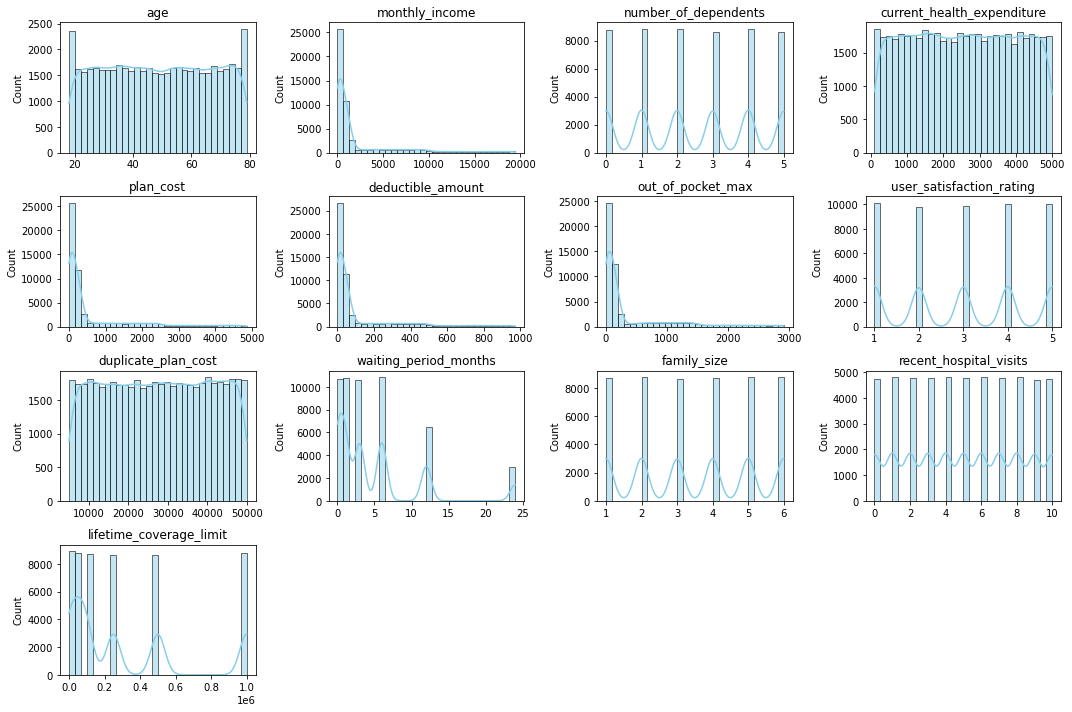

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns, excluding 'user_id'
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Remove 'user_id' from the list
if 'user_id' in numerical_cols:
    numerical_cols.remove('user_id')

# Set figure size
plt.figure(figsize=(15, 10))
# Loop through numerical columns and create subplots
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)  # Adjust grid size based on number of numerical columns
    sns.histplot(df[col].dropna(), kde=True, bins=30, color="skyblue")  # Histogram with KDE
    plt.title(col)
    plt.xlabel("")
    
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Key observation

1. Uniform Distributions (Flat distributions with evenly spaced bars)

* Some features appear to be evenly distributed, meaning values are spread almost equally across the range.

2. Right-Skewed Distributions (Long right tail, high concentration of values on the left)

* Features with most values concentrated on the lower end and a few extending far to the right.

* These could indicate variables like monthly income, plan cost, or health expenditure, where a small number of individuals have significantly higher values.


## Bivariate analysis

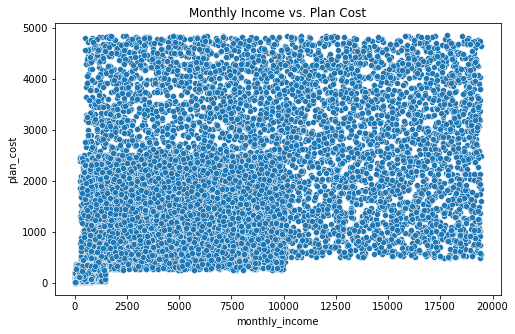

In [26]:
# check the relationship between monthly income and plan_cost
plt.figure(figsize=(8, 5))
sns.scatterplot(x="monthly_income", y="plan_cost", data=df)
plt.title("Monthly Income vs. Plan Cost")
plt.show()


Lack of Clear Correlation, no clear trend (e.g., upward or downward pattern) is visible.
This could imply that the two variables do not have a strong linear relationship.